In [1]:
from letter import gxl2Graph, Letter
import json
import networkx as nx
import matplotlib.pyplot as plt
from EMD import GGMD
import numpy as np
from ggd import ggd
from graph import Point, Graph

In [4]:
data = open('../data/Letter/json/LOW/AP1_0040.json')
gxl = json.load(data)
g = gxl2Graph(gxl)
l = Letter(C_V = 2, C_E = 1, sort = True)

l.classify(g)
#l.findModels(g)


'A'

In [5]:
#G1, G2 = g1.toNX(), g2.toNX()
cost, flow, D = GGMD(g1, g2, 2, 1.5, 1000)
for u in flow.values():
    for v, w in u.items():
        u[v] = { 'weight': w } 
F = nx.DiGraph(flow)
F.remove_node("eps1")
F.remove_node("eps2")
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w == 0])

NameError: name 'g1' is not defined

In [ ]:
c, f = ggd(g2, g1, 2, 1)
H = nx.DiGraph(f)

In [ ]:
cost, c

(13.87, 10.15809545845882)

In [ ]:
pos1 = nx.get_node_attributes(G1,  'coords')
pos2 = nx.get_node_attributes(G2,  'coords')

#pos1 = { u.label: u.coords for u in g1.vertices }
#pos2 = { u.label: u.coords for u in g2.vertices }

for k in pos2.keys():
        pos2[k] = np.add( pos2[k], (0,0))
pos = pos1 | pos2
#pos = {"eps1": (0, 3), "eps2": (0, -3)}

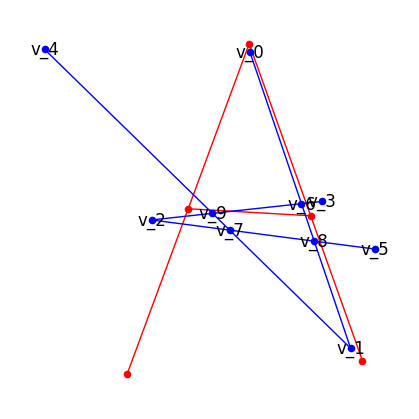

In [ ]:
fig = plt.figure(figsize=(4, 4))
nx.draw(G1, pos1, edge_color = "red", node_color = "red", node_size = 20, with_labels = False)
nx.draw(G2, pos2, edge_color = "blue", node_color = "blue", node_size = 20, with_labels = True)
#nx.draw(F, pos, edge_color = "gray", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)

#nx.draw(H, pos, edge_color = "green", width = 0.5, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)
# 
# weights = nx.get_edge_attributes(F, 'weight').values()
# nx.draw(F, pos, **options, width=list(weights))

In [ ]:
p1 = Point((0,0), 'u_0')
p2 = Point((1,0), 'u_1')
p3 = Point((3,0), 'u_2')

q1 = Point((0,0), 'v_0')
q2 = Point((1,0), 'v_1')
q3 = Point((3,0), 'v_2')


In [ ]:
g1 = Graph([p1, p2, p3], [[p1, p2]])

In [ ]:
g2 = Graph([q1, q2, q3], [[q1, q2], [q2, q3]])

In [ ]:
ggd(g1, g2, 1, 1)

(2.0, [('u_0', 'v_0'), ('u_1', 'v_1')])

In [ ]:
c = GGMD(g1, g2, 1, 1, 1000)

In [ ]:
nx.to_dict_of_dicts(D)

{'u_0': {'v_0': {'weight': 5112},
  'v_1': {'weight': 4029},
  'v_2': {'weight': 2732},
  'v_3': {'weight': 4310},
  'v_4': {'weight': 4943},
  'v_5': {'weight': 4679},
  'v_6': {'weight': 4695},
  'v_7': {'weight': 4369},
  'v_8': {'weight': 4472},
  'v_9': {'weight': 4623},
  'eps2': {'weight': 823}},
 'u_1': {'v_0': {'weight': 1778},
  'v_1': {'weight': 5647},
  'v_2': {'weight': 4226},
  'v_3': {'weight': 3852},
  'v_4': {'weight': 4590},
  'v_5': {'weight': 4749},
  'v_6': {'weight': 4385},
  'v_7': {'weight': 5217},
  'v_8': {'weight': 4770},
  'v_9': {'weight': 3593},
  'eps2': {'weight': 1671}},
 'u_2': {'v_0': {'weight': 4792},
  'v_1': {'weight': 943},
  'v_2': {'weight': 4177},
  'v_3': {'weight': 2736},
  'v_4': {'weight': 6622},
  'v_5': {'weight': 2085},
  'v_6': {'weight': 3667},
  'v_7': {'weight': 4451},
  'v_8': {'weight': 2850},
  'v_9': {'weight': 3569},
  'eps2': {'weight': 716}},
 'u_3': {'v_0': {'weight': 4394},
  'v_1': {'weight': 5171},
  'v_2': {'weight': 2839

In [ ]:
c

(2.0,
 {'u_0': {'v_0': 1000, 'v_1': 0, 'v_2': 0, 'eps2': 0},
  'u_1': {'v_0': 0, 'v_1': 1000, 'v_2': 0, 'eps2': 0},
  'u_2': {'v_0': 0, 'v_1': 0, 'v_2': 1000, 'eps2': 0},
  'eps1': {'v_0': 0, 'v_1': 0, 'v_2': 0, 'eps2': 3000},
  'v_0': {},
  'v_1': {},
  'v_2': {},
  'eps2': {}},
 <networkx.classes.digraph.DiGraph at 0x7fa58fc9a020>)